# Learning
Fit a model to the data

In [1]:

# first neural network with keras make predictions
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
# load the dataset
dataset = loadtxt('../data/holes6.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:6]
y = dataset[:,7]

train_dataset = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle and slice the dataset.
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)


Using TensorFlow backend.


OSError: ../holes6.csv not found.

# Define model

In [57]:
# define the keras model
model = Sequential()
model.add(Dense(20, input_dim=6, activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# compile the keras model
print("Compiling model...")
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
"Done."

Compiling model...


'Done.'

# Fit 

In [58]:
# fit the keras model on the dataset
print("Fitting model...")
history = model.fit(X, y, epochs=100, batch_size=20, verbose=0)
"Done."

Fitting model...


'Done.'

In [59]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy'])


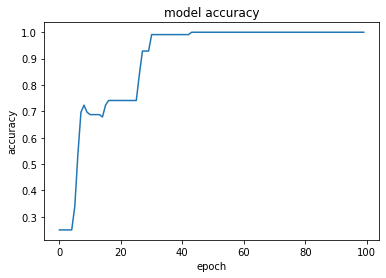

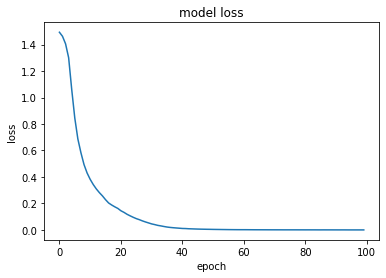

In [60]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Make predictions

In [61]:

# make class predictions with the model
print("Making predictions...")
predictions = model.predict(X)


Making predictions...


# Evaluate results

In [62]:

error = np.subtract(y,predictions)
error = np.hstack((error, range(len(y))))

# summarize the first 5 cases
for i in range(100):
	print('%s => %.1f (expected %.1f)' % (X[i].tolist(), predictions[i], y[i]))

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)